In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

%config Completer.use_jedi = False


/kaggle/input/housing-dataset/Housing.csv


In [2]:
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")
House_Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Checking the length of the data frame
House_Data_length = House_Data.sample(n=len(House_Data), random_state=1)
House_Data_length


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,7070000,6240,4,2,2,yes,no,no,no,yes,1,no,furnished
247,4550000,8400,4,1,4,yes,no,no,no,no,3,no,unfurnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished
107,6125000,6420,3,1,3,yes,no,yes,no,no,0,yes,unfurnished
483,2940000,6615,3,1,2,yes,no,no,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
144,5600000,4700,4,1,2,yes,yes,yes,no,yes,1,no,furnished
72,6720000,5020,3,1,4,yes,no,no,no,yes,0,yes,unfurnished
235,4620000,5680,3,1,2,yes,yes,no,no,yes,1,no,semi-furnished


In [4]:
House_Data.shape

(545, 13)

* **This indicates the House dataset has 545 rows and 13 columns.**

In [5]:
#checking mainroad proximity
House_Data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [6]:
Convert_non_numeric = pd.get_dummies(House_Data[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]).astype(int)
Convert_non_numeric

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0,1,1,0,1,0,1,0,0,1,0,1
1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,1,0,0,1,1,0,1,0,0,1
3,0,1,1,0,0,1,1,0,0,1,0,1
4,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,1,1,0,0,1,1,0,1,0,1,0
541,1,0,1,0,1,0,1,0,1,0,1,0
542,0,1,1,0,1,0,1,0,1,0,1,0
543,1,0,1,0,1,0,1,0,1,0,1,0


In [7]:
House_Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
House_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# Drop non numeric variables
House_Data_drop = House_Data.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'], axis = 1)
House_Data_drop

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished
541,1767150,2400,3,1,1,0,semi-furnished
542,1750000,3620,2,1,1,0,unfurnished
543,1750000,2910,3,1,1,0,furnished


In [10]:
House_Data_Ready = pd.concat([Convert_non_numeric, House_Data_drop], axis=1)
House_Data_Ready.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,0,1,1,0,1,0,1,0,0,1,0,1,13300000,7420,4,2,3,2,furnished
1,0,1,1,0,1,0,1,0,0,1,1,0,12250000,8960,4,4,4,3,furnished
2,0,1,1,0,0,1,1,0,1,0,0,1,12250000,9960,3,2,2,2,semi-furnished
3,0,1,1,0,0,1,1,0,0,1,0,1,12215000,7500,4,2,2,3,furnished
4,0,1,0,1,0,1,1,0,0,1,1,0,11410000,7420,4,1,2,2,furnished


In [11]:
# check if there are null values after cleaning data
House_Data_Ready = House_Data_Ready.dropna()
len(House_Data_Ready)

545

In [12]:
train_pd, test_pd, val_pd = House_Data_Ready[:330],House_Data_Ready[330:450],House_Data_Ready[450:]
len(train_pd),len(test_pd),len(val_pd)

(330, 120, 95)

In [13]:
#create  a matrix
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_train

array([[0, 1, 1, ..., 2, 3, 2],
       [0, 1, 1, ..., 4, 4, 3],
       [0, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 0, 1, ..., 1, 2, 1],
       [1, 0, 1, ..., 2, 2, 0],
       [0, 1, 1, ..., 1, 2, 0]], dtype=object)

In [14]:
x_train.shape

(330, 18)

In [36]:
y_train.shape

(330,)

In [43]:
# setup the test model
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1],val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1],test_pd.to_numpy()[:, -1]
x_train.shape, y_train.shape, x_val.shape, y_val.shape,x_test.shape, y_test.shape 

((330, 18), (330,), (95, 18), (95,), (120, 18), (120,))

In [15]:
# Assuming you have loaded train_pd, val_pd, test_pd from your data
# Splitting the data as per the provided code
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

# Check the shapes
print("Training data shapes:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("\nValidation data shapes:")
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

print("\nTesting data shapes:")
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


Training data shapes:
x_train shape: (330, 18)
y_train shape: (330,)

Validation data shapes:
x_val shape: (95, 18)
y_val shape: (95,)

Testing data shapes:
x_test shape: (120, 18)
y_test shape: (120,)


In [46]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming x_train has 18 features
x_train = np.random.rand(100, 18)  # Random data for example

# Fit the scaler on the first 13 features
scaler = StandardScaler().fit(x_train[:, :13])

def preprocessor(X, scaler):
    A = np.copy(X)
    A[:, :13] = scaler.transform(A[:, :13])
    return A

# Using the preprocessor function
x_train_preprocessor = preprocessor(x_train, scaler)

# Checking the shape of the preprocessed data
print(x_train_preprocessor.shape)


(100, 18)


In [48]:
from sklearn.preprocessing import StandardScaler
import numpy as np

x_train = np.random.rand(100, 18)

scaler = StandardScaler().fit(x_train[:, :13])

def preprocessor(X):
    A = np.copy(X)
    A[:, :13] = scaler.transform(A[:, :13])
    return A

x_train_prepropcessor = preprocessor(x_train)
x_train_preprocessor  

array([[ 0.93955047, -0.40387818, -0.87054999, ...,  0.66490699,
         0.15854432,  0.23319186],
       [-0.92189028, -0.69585132,  1.15736836, ...,  0.4079511 ,
         0.08834804,  0.23333854],
       [-1.31770525,  0.52466443, -0.58105617, ...,  0.60216176,
         0.40732672,  0.91358662],
       ...,
       [-0.73981357,  1.26370043, -0.50912205, ...,  0.93083002,
         0.75107915,  0.06680856],
       [-1.02410179, -0.61921335, -0.27454033, ...,  0.25160094,
         0.7715617 ,  0.33592172],
       [-0.8751072 ,  0.25713709,  0.76620651, ...,  0.59848752,
         0.7841575 ,  0.37436477]])

In [50]:
pd.DataFrame(x_train_preprocessor).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.939550,-0.403878,-0.870550,1.574582,1.729882,1.051334,0.904042,-1.403866,-0.531858,-0.553599,0.229100,0.132923,-0.391738,0.962017,0.173455,0.664907,0.158544,0.233192
1,-0.921890,-0.695851,1.157368,-1.824425,-0.927129,1.485838,0.950119,-0.427680,-0.558722,-0.912469,-1.574824,0.335261,1.518160,0.131801,0.073586,0.407951,0.088348,0.233339
2,-1.317705,0.524664,-0.581056,0.159916,1.612849,-1.219548,0.113860,-1.166330,0.217524,-1.440234,0.212487,1.730403,0.612099,0.532559,0.716877,0.602162,0.407327,0.913587
3,-1.071348,0.133784,1.577260,-1.695459,1.224104,-0.844435,-0.623079,-1.310435,-0.294573,1.670914,1.050324,1.215243,0.900636,0.025935,0.287088,0.683081,0.614513,0.186852
4,1.179714,-0.219907,0.108040,1.278744,-1.142056,0.912144,-0.586481,-1.288299,0.129338,1.241628,-0.522287,-0.190037,-1.382274,0.894536,0.846306,0.780893,0.035800,0.187816


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: >, <Axes: >]], dtype=object)

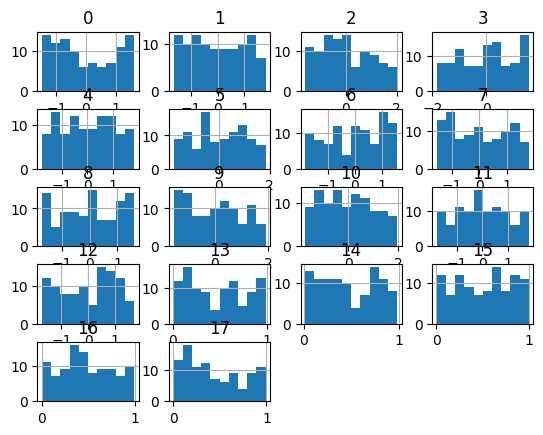

In [59]:

pd.DataFrame(x_train_preprocessor).hist()

array([[<Axes: title={'center': '1'}>]], dtype=object)

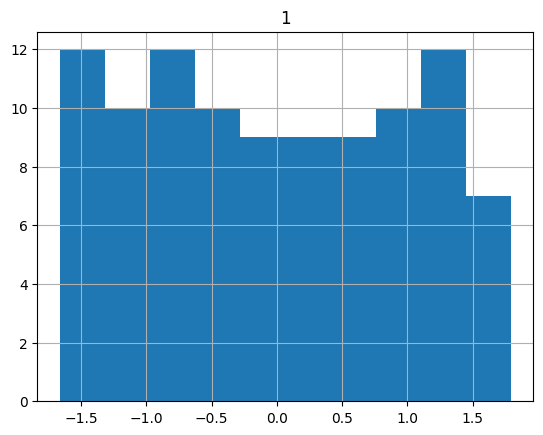

In [62]:
pd.DataFrame(x_train_preprocessor).hist(1) # the first histogram, this can be used for all the 17 Histograms.

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for training data
Y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)
print("Training MSE:", mse_train)
print("Training MAE:", mae_train)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for testing data
mse_test = mean_squared_error(Y_test, Y_pred)
mae_test = mean_absolute_error(Y_test, Y_pred)
print("Testing MSE:", mse_test)
print("Testing MAE:", mae_test)


In [ ]:
import pandas as pd

# Load the data from the CSV file
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

# Map 'yes' and 'no' to boolean values
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})

# Display the first few rows of the cleaned DataFrame
hdt = House_Data
hdt.head()
#print(House_Data.head())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
House_Data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

# Check for missing values
missing_values = House_Data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values
House_Data.dropna(inplace=True)

# Map 'yes' and 'no' to boolean values
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
House_Data[boolean_columns] = House_Data[boolean_columns].replace({'yes': True, 'no': False})

# Convert 'furnishingstatus' to numerical
House_Data['furnishingstatus'] = House_Data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Prepare data for plotting
plot_data = House_Data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']]

# Plot histograms for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(plot_data.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(plot_data[col], bins=20, color='skyblu', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()
